# Mnist

### 1. Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision

train_data = torchvision.datasets.MNIST(
    root = 'data',
    train = True,                       
    transform = torchvision.transforms.ToTensor(), 
    download = True,            
)
test_data = torchvision.datasets.MNIST(
    root = 'data', 
    train = False, 
    transform = torchvision.transforms.ToTensor()
)

train_data

test_data # 제출시 이 test 데이터에 대한 정확도를 출력하세요.

9913344it [00:01, 6265952.82it/s]                             


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



29696it [00:00, 3105389.10it/s]          

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw




1649664it [00:00, 4743861.44it/s]                             


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



5120it [00:00, 13430166.65it/s]         


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



/opt/homebrew/Caskroom/miniforge/base/envs/tf25/lib/python3.8/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /Users/runner/miniforge3/conda-bld/pytorch-recipe_1635217280611/work/torch/csrc/utils/tensor_numpy.cpp:189.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [2]:
test_data.data.data.shape

torch.Size([10000, 28, 28])

### 1-1. 데이터 전처리

In [3]:
x_train=(torch.flatten(train_data.data,start_dim=1)/255).float()
y_train=train_data.targets
x_test=(torch.flatten(test_data.data,start_dim=1)/255).float()
y_test=test_data.targets

### 2. Model (input = 784, hidden layer 1,2 = 256, output = 10) with softmax function

In [4]:
model=torch.nn.Sequential(
    torch.nn.Linear(784,256),
    torch.nn.ReLU(),
    torch.nn.Linear(256,256),
    torch.nn.ReLU(),
    torch.nn.Linear(256,10) # 모델 맨 밑에 softmax를 넣지 않은 이유는 pytorch의 CrossEntropyLoss 함수에 softmax가 포함되어있기 때문
)


### 3. Loss and Optimizer (loss function=CE, optimizer=Adam)

In [5]:
learning_rate=0.01
epochs=80
criterion=torch.nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)

### 4. Train/Test 

In [6]:
train_loss=[]
train_acc=[]
test_loss=[]
test_acc=[]

for n in range(epochs): # Train 
    for i in range(1): # 

        y_pred = model(x_train)
        loss = criterion(y_pred,y_train)
        

        prediction=y_pred.max(1)[1]
        corrects = (prediction == y_train)
        accuracy = corrects.sum().float() / float(y_train.size(0))
    

        optimizer.zero_grad() # zero_grad(): 미분값 초기화
        loss.backward() # backpropagation
        optimizer.step() # update weights and biases
    
    with torch.no_grad(): # Test, epoch-test_loss,test_accuracy를 보기 위해 같이 넣음 
        for j in range(1):
           
            
            y_pred2 = model(x_test)
            loss2 = criterion(y_pred2,y_test)
       

            prediction2=y_pred2.max(1)[1]
            corrects2 = (prediction2 == y_test)
            accuracy_test = corrects2.sum().float() / float(y_test.size(0))
    

 

    train_acc.append(accuracy)
    train_loss.append(loss.item())
    test_acc.append(accuracy_test)
    test_loss.append(loss2.item())
    
    
    print("Epoch {} : Train - loss: {:8f}, Accuracy: {:8f} Test - loss: {:8f},  Accuracy: {:8f}".format(n+1,loss.item(),accuracy,loss2.item(),accuracy_test))

print("Done")

Epoch 1 : Train - loss: 2.304767, Accuracy: 0.093433 Test - loss: 1.998643,  Accuracy: 0.390800
Epoch 2 : Train - loss: 2.001326, Accuracy: 0.378167 Test - loss: 1.565833,  Accuracy: 0.493900
Epoch 3 : Train - loss: 1.570883, Accuracy: 0.496617 Test - loss: 1.677006,  Accuracy: 0.474000
Epoch 4 : Train - loss: 1.681083, Accuracy: 0.471617 Test - loss: 1.414562,  Accuracy: 0.561000
Epoch 5 : Train - loss: 1.437519, Accuracy: 0.551283 Test - loss: 1.048042,  Accuracy: 0.629100
Epoch 6 : Train - loss: 1.058385, Accuracy: 0.628300 Test - loss: 0.979544,  Accuracy: 0.657800
Epoch 7 : Train - loss: 0.976006, Accuracy: 0.657783 Test - loss: 0.826754,  Accuracy: 0.695500
Epoch 8 : Train - loss: 0.823267, Accuracy: 0.701867 Test - loss: 0.659652,  Accuracy: 0.802100
Epoch 9 : Train - loss: 0.661949, Accuracy: 0.801150 Test - loss: 0.585596,  Accuracy: 0.805700
Epoch 10 : Train - loss: 0.594321, Accuracy: 0.806233 Test - loss: 0.537082,  Accuracy: 0.828100
Epoch 11 : Train - loss: 0.550727, Accu

In [7]:
epochs2=np.arange(1,epochs+1)

### 4-1. Test Accuracy

In [8]:
print('Test Accuracy: {}'.format(test_acc[-1])) # test 데이터의 정확도. epoch를 늘려도 정확도가 증가는 하지만 크게 변하진 않고, test loss가 증가하여 더 늘리지 않음

Test Accuracy: 0.9743000268936157


### 5. Result Plot

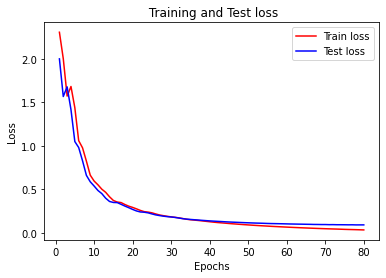

In [9]:
plt.plot(epochs2,train_loss,'r-',label='Train loss')
plt.plot(epochs2,test_loss,'b-',label='Test loss')
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title(' Training and Test loss');

plt.show()

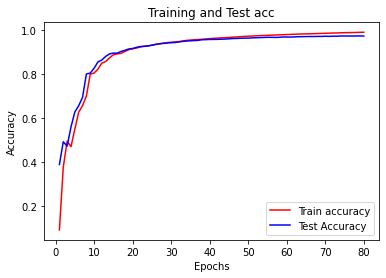

In [10]:
plt.plot(epochs2,train_acc,'r-',label='Train accuracy')
plt.plot(epochs2,test_acc,'b-',label='Test Accuracy')
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Test acc');

plt.show()